<a href="https://colab.research.google.com/github/manish2509/Sparks-Intern/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task - 1**

**Author :** S.Manishma

**Problem : To Predict the percentage of marks of the students based on the number of hours they studied**

In [ ]:
#importing the required libraries
#pandas is used to reading the dataset
import pandas as pd
#Numpy is used to access the huge matrix of data
import numpy as np
#Matplotlib and seaborn are used for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
#sklearn is used to building and training the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
#reading the Data set
data = pd.read_csv('http://bit.ly/w-data')
#returing the first 5 rows of data
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#check if null data is present in the dataset
if(data.isnull==True):
  print("We have null data")
else:
  print("we donot have null data")

we donot have null data


***Checking the Assumptions of Linear Regression:***

**1. Linear Relationship**


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Text(0.5, 1.0, 'Linear Relationship Exists')

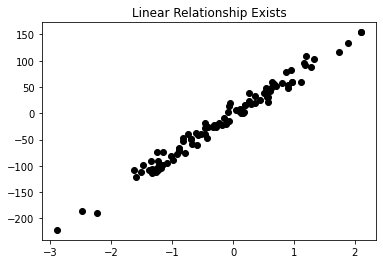

In [ ]:
from sklearn.datasets.samples_generator import make_regression
x1, y1 = make_regression(n_samples=100, n_features=1, noise=10)
plt.plot(x1, y1, 'o', color='black');
plt.title("Linear Relationship Exists")

<function matplotlib.pyplot.show>

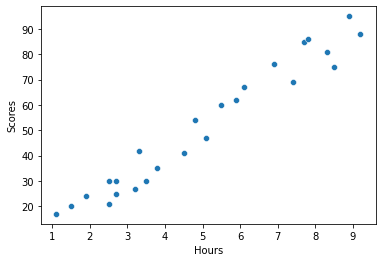

In [ ]:
#Visualising the data using scatterplot
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show

**2. Normal Distribution**

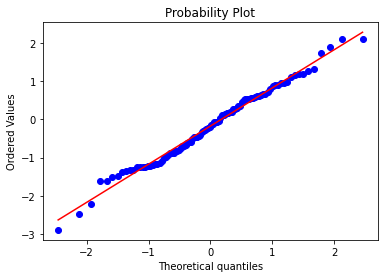

In [ ]:
import scipy.stats as stats
stats.probplot(x1[:,0], dist="norm", plot=plt)
plt.show()

**3. No or little Collinearity**

In [ ]:
x2, y2 = make_regression(n_samples=100, n_features=2, noise=20)
#convert to a pandas dataframe
import pandas as pd
df = pd.DataFrame(x2)
df.columns = ['x1','x2']
#generate correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x2
x1,1.000000,-0.005907
x2,-0.005907,1.000000


 If you find any values in which the absolute value of their correlation is >=0.8, the multicollinearity assumption is being broken.

<function matplotlib.pyplot.show>

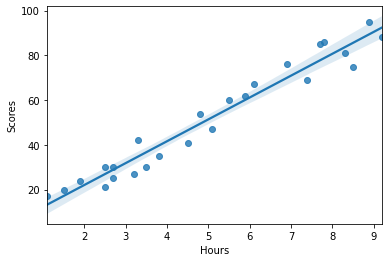

In [ ]:
#Visualising the data using regression plot
sns.regplot(y=data["Scores"],x=data["Hours"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show

**Splitting the Data**

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**Fitting the Data into the model**

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the Percentage**

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Comparing predicted values with actual value**s

In [ ]:

compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Visualising the predicted marks with the actual marks**

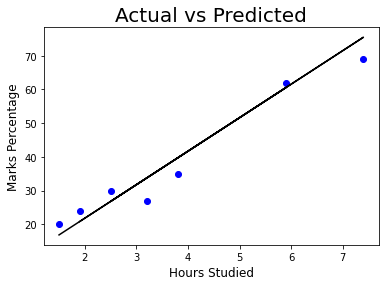

In [ ]:

plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Evaluating the model**


In [ ]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))


Mean absolute error:  4.130879918502482


***What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?***

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
